<a href="https://colab.research.google.com/github/JoaoPariss/MODULO-34---REGRESSAO-AVANCADA/blob/main/Profissao_Cientista_de_Dados_M34_Pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [84]:
# Importação das Bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [85]:
# Carregamento da Base
df = pd.read_csv('ALUGUEL_MOD12.csv', delimiter=';')
df

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
...,...,...,...,...,...,...,...
7198,25000,7500,627,4,5,4,6
7199,25000,4600,364,4,2,1,0
7200,25000,3700,266,3,4,3,7
7201,25000,6000,600,4,5,4,8


Escolheremos a variável X a partir da matriz de correlação

In [86]:
correlation_matrix = df.corr()
correlation_matrix

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
Valor_Aluguel,1.000000,0.695302,0.730591,0.413139,0.603715,0.614397,0.652858
Valor_Condominio,0.695302,1.000000,0.805926,0.497420,0.585795,0.589244,0.690993
Metragem,0.730591,0.805926,1.000000,0.678091,0.687558,0.696281,0.743872
N_Quartos,0.413139,0.497420,0.678091,1.000000,0.553807,0.540887,0.591224
N_banheiros,0.603715,0.585795,0.687558,0.553807,1.000000,0.920149,0.694983
N_Suites,0.614397,0.589244,0.696281,0.540887,0.920149,1.000000,0.712054
N_Vagas,0.652858,0.690993,0.743872,0.591224,0.694983,0.712054,1.000000


Excetuando a Metragem, utilizada na aula, a variável mais correlacionada com o valor de aluguel é o valor de condomínio, portanto, iremos utilizá-la.

In [87]:
y = df['Valor_Aluguel']
X = df[['Valor_Condominio']]

# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [88]:
poly_features = PolynomialFeatures(degree=2)

In [89]:
x_poly = poly_features.fit_transform(X)

In [90]:
x_poly

array([[1.000000e+00, 2.950000e+02, 8.702500e+04],
       [1.000000e+00, 0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00],
       ...,
       [1.000000e+00, 3.700000e+03, 1.369000e+07],
       [1.000000e+00, 6.000000e+03, 3.600000e+07],
       [1.000000e+00, 1.587000e+03, 2.518569e+06]])

# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

In [92]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


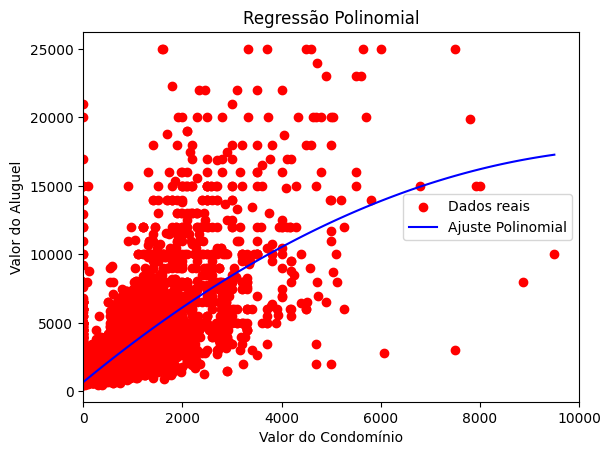

In [93]:
y_pred = model.predict(x_test)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)


plt.scatter(X, y, color='red', label='Dados reais')
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')
plt.xlabel('Valor do Condomínio')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.xlim(0, 10000) # Limite de x ajustado, de forma a observarmos todos os pontos.
plt.show()

In [94]:
r2_score_d2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2_score_d2}')

R² Score: 0.5083017424135208


In [105]:
print("Mean Squared Error em Grau 2:", mean_squared_error(y_test, y_pred))

Mean Squared Error em Grau 2: 5325674.752141847


Utilizando grau=2, obtivemos um R²=0,508, o que indica que a variação no valor do condomínio explica 50,8% das variações no valor do aluguel. É um resultado superior à regressão com grau 2 feita em aula com a metragem.

O Mean Squared Error (MSE) de 5.325.674,75 indica que, em média, o quadrado das diferenças entre os valores previstos e reais do aluguel é esse valor; a raiz quadrada desse erro (RMSE) é cerca de 2.307, ou seja, o modelo de grau 2 erra, em média, aproximadamente 2.307 no valor do aluguel.

# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

In [95]:
y_d4 = df['Valor_Aluguel']
X_d4 = df[['Valor_Condominio']]

In [96]:
poly_features_d4 = PolynomialFeatures(degree=4)

In [97]:
x_poly_d4 = poly_features_d4.fit_transform(X)

In [98]:
x_poly_d4

array([[1.00000000e+00, 2.95000000e+02, 8.70250000e+04, 2.56723750e+07,
        7.57335062e+09],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [1.00000000e+00, 3.70000000e+03, 1.36900000e+07, 5.06530000e+10,
        1.87416100e+14],
       [1.00000000e+00, 6.00000000e+03, 3.60000000e+07, 2.16000000e+11,
        1.29600000e+15],
       [1.00000000e+00, 1.58700000e+03, 2.51856900e+06, 3.99696900e+09,
        6.34318981e+12]])

In [99]:
x_train_d4, x_test_d4, y_train_d4, y_test_d4 = train_test_split(x_poly_d4, y, test_size=0.2, random_state=42)

In [100]:
model_d4 = LinearRegression()
model_d4.fit(x_train_d4, y_train_d4)

LinearRegression()

In [101]:
y_pred_d4 = model_d4.predict(x_test_d4)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


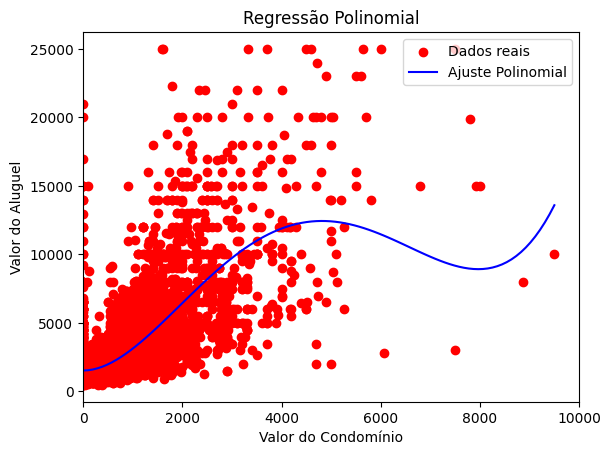

In [102]:
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features_d4.transform(x_range)
y_range_pred = model_d4.predict(x_range_poly)


plt.scatter(X, y, color='red', label='Dados reais')
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')
plt.xlabel('Valor do Condomínio')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.xlim(0, 10000)
plt.show()

In [103]:
r2_score_d4 = r2_score(y_test_d4, y_pred_d4)
print(f'R² Score: {r2_score_d4}')

R² Score: 0.5126350135608705


In [107]:
print("Mean Squared Error em Grau 4:", mean_squared_error(y_test_d4, y_pred_d4))

Mean Squared Error em Grau 4: 5278740.291041858


Utilizando grau=4, obtivemos um R² = 0,513, o que indica que a variação no valor do condomínio explica 51,3% das variações no valor do aluguel. Esse resultado é um pouco melhor que o obtido com grau 2, mostrando que o modelo de grau 4 conseguiu capturar melhor essa relação.

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.
Lasso, Ridge e Elastic Net são técnicas de regressão que ajudam a evitar o problema de overfitting, ou seja, quando o modelo se ajusta demais aos dados de treino e perde capacidade de generalizar.

*  Lasso: adiciona uma penalidade que pode zerar coeficientes, eliminando variáveis que não ajudam muito e fazendo uma seleção automática das mais relevantes.

*  Ridge: adiciona uma penalidade que força os coeficientes a ficarem menores, mas sem zerar nenhum deles. Isso reduz o impacto de variáveis pouco importantes, mantendo todas no modelo.

*  Elastic Net: combina as penalidades de Lasso e Ridge, aproveitando o que cada
uma tem de melhor: reduz coeficientes e também pode zerar alguns, o que é útil quando há muitas variáveis correlacionadas.